In [ ]:
#Import Modules

import torch
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "C:/Users/asalvi/Documents/Ameya_workspace/DiffusionDataset/ConeCamAngEst/training/") 
from modules.conv_residual import ConditionalResidualBlock1D  # Import Conv1D module

In [ ]:
#Input to go through the neural network

x = torch.sin(torch.linspace(0, 2 * torch.pi, 100)).unsqueeze(0).unsqueeze(0)  # (B:1, C:1, T:100)
cond = torch.randn(1, 50)  # Shape: (B:1, len:50)

In [ ]:
#Initialize CNN instance
model = ConditionalResidualBlock1D(1, 1, 50)

In [ ]:
# Dictionary to store activations
activations = {}

# Hook function generator
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Register hooks on each Conv1dBlock layer (Conv, GroupNorm, Mish)
for i, block in enumerate(model.blocks):
    block.block[0].register_forward_hook(get_activation(f'block_{i}_conv'))
    block.block[1].register_forward_hook(get_activation(f'block_{i}_gnorm'))
    block.block[2].register_forward_hook(get_activation(f'block_{i}_mish'))

# Register hooks for cond_encoder (Mish, Linear)
model.cond_encoder[0].register_forward_hook(get_activation('cond_encoder_mish'))
model.cond_encoder[1].register_forward_hook(get_activation('cond_encoder_linear'))


In [10]:
# Output : no_grad is the method to not compute gradients

with torch.no_grad():
    out = model(x)

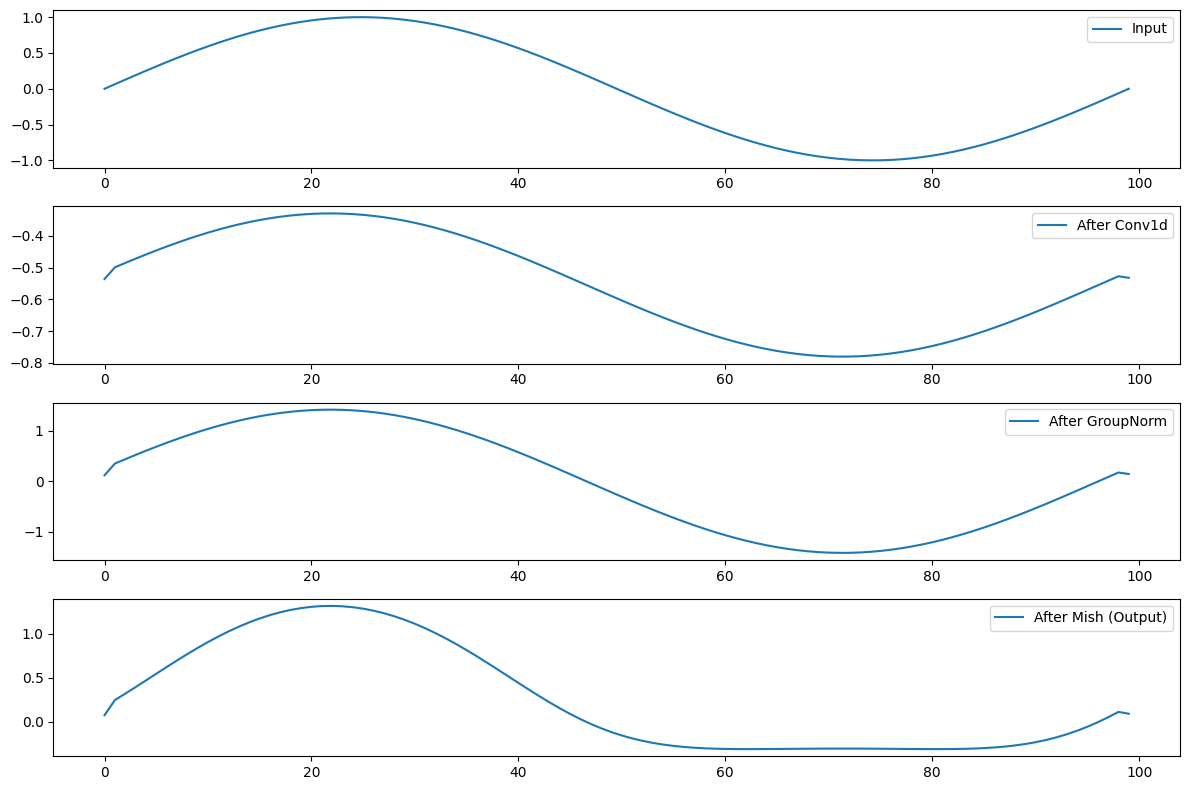

In [ ]:
# Plot the input and the three intermediate outputs from block 0
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(x[0, 0].detach().numpy(), label='Input')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(activations['block_0_conv'][0, 0].detach().numpy(), label='After Conv1d')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(activations['block_0_gnorm'][0, 0].detach().numpy(), label='After GroupNorm')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(activations['block_0_mish'][0, 0].detach().numpy(), label='After Mish (Output of Block 0)')
plt.legend()

plt.tight_layout()
plt.show()

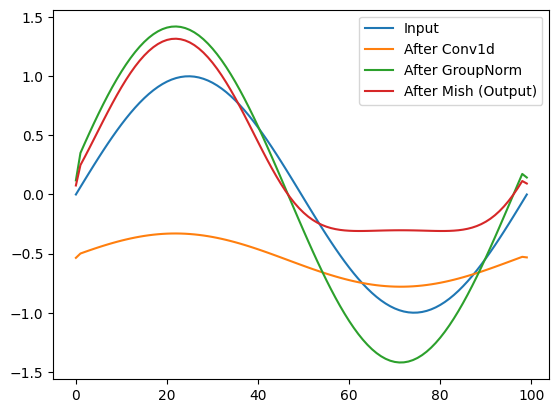

In [12]:
#Plots
plt.figure()

plt.plot(x[0, 0].numpy(), label='Input')
plt.plot(activations['conv'][0, 0].numpy(), label='After Conv1d')
plt.plot(activations['gnorm'][0, 0].numpy(), label='After GroupNorm')
plt.plot(activations['mish'][0, 0].numpy(), label='After Mish (Output)')
plt.legend()

plt.show()
